In [268]:
# @title Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

#Number of Content Titles by Rating
plt.figure(figsize=(10, 8))
sns.countplot(x='Rating', hue="Rating",data=netflix, order=netflix["Rating"].value_counts().index.to_list(), palette='viridis')
plt.title('Number of Content Titles by Rating', fontsize=21);

In [269]:
#Loading the Dataset
netflix = pd.read_csv("NetflixData.csv")

In [270]:
#The first 3 rows of the dataset
netflix.head(3)

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"


In [271]:
#Checking shape of the dataset
netflix.shape

(5967, 13)

In [272]:
#Checking columns of the dataset
netflix.columns

Index(['Show Id', 'Title', 'Description', 'Director', 'Genres', 'Cast',
       'Production Country', 'Release Date', 'Rating', 'Duration',
       'Imdb Score', 'Content Type', 'Date Added'],
      dtype='object')

In [273]:
#Checking information of the dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [274]:

#Checking null value of the dataset
netflix.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

In [275]:
#Imputing missing values
netflix.Cast.fillna("cast unavailable", inplace=True)
netflix["Production Country"].fillna("production country unavailable", inplace=True)
netflix.Director.fillna("director unavailable", inplace=True)

In [276]:
#Dropping missing values
netflix.dropna(subset=["Release Date", "Rating", "Duration", "Imdb Score"], inplace=True)
netflix.drop(["Date Added"], axis=1, inplace=True)

In [277]:
#Converting data type
netflix['Imdb Score'] = netflix['Imdb Score'].str.replace('/10', '')
netflix['Imdb Score'] = netflix['Imdb Score'].apply(pd.to_numeric)
netflix = netflix.rename(columns={'Release Date':'release_year'})
netflix['release_year'] = netflix['release_year'].astype(int)

In [278]:
#Data information
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5359 entries, 0 to 5966
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5359 non-null   object 
 1   Title               5359 non-null   object 
 2   Description         5359 non-null   object 
 3   Director            5359 non-null   object 
 4   Genres              5359 non-null   object 
 5   Cast                5359 non-null   object 
 6   Production Country  5359 non-null   object 
 7   release_year        5359 non-null   int64  
 8   Rating              5359 non-null   object 
 9   Duration            5359 non-null   object 
 10  Imdb Score          5359 non-null   float64
 11  Content Type        5359 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 544.3+ KB


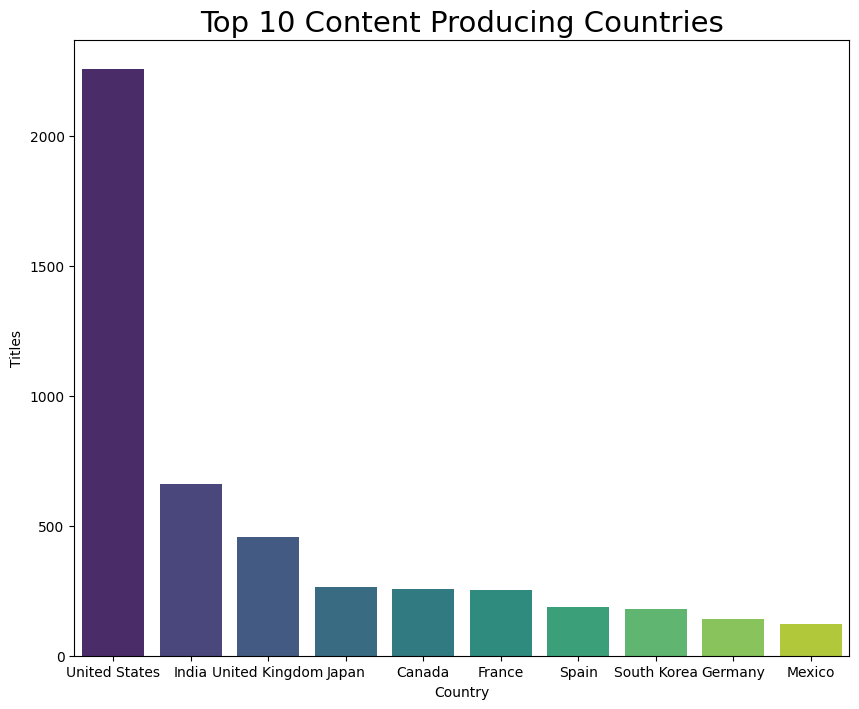

In [279]:
# Top 10 Content Producing Countries
Countries = netflix['Production Country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
Countries = Countries[Countries != 'production country unavailable']
Countries_count = Countries.value_counts().head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=Countries_count.index, y=Countries_count.values, palette='viridis', hue=Countries_count.index, legend=False)
plt.title('Top 10 Content Producing Countries', fontsize=21)
plt.xlabel('Country')
plt.ylabel('Titles')
plt.show()

In [280]:
#Distribution Map of Producing Countries
countries = netflix.set_index('Title')["Production Country"].str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
countries = countries[countries != 'production country unavailable']

iplot([go.Choropleth(
    locationmode='country names',
    locations=countries,
    z=countries.value_counts()
)])

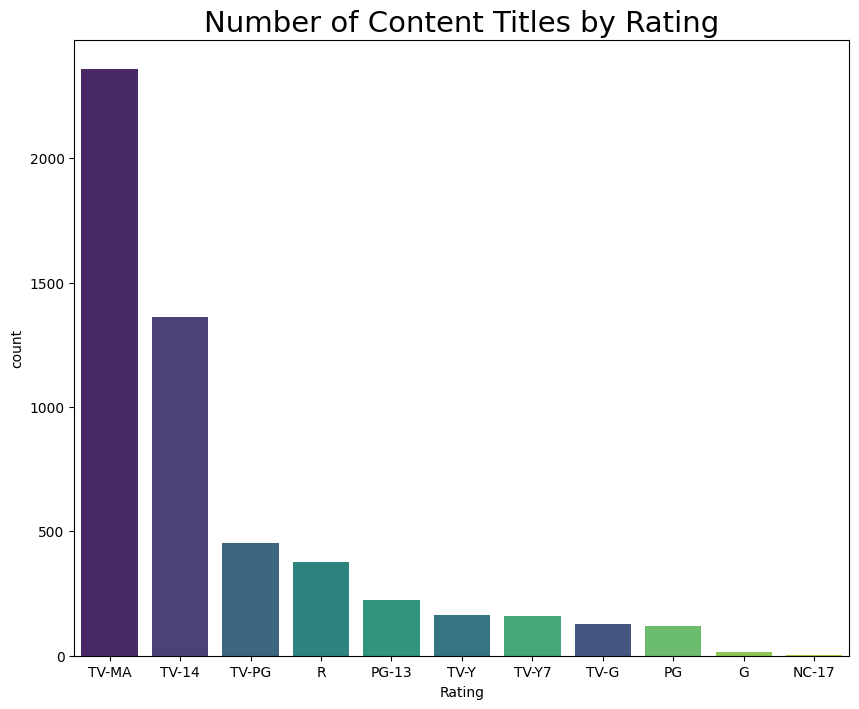

In [281]:
#Number of Content Titles by Rating
plt.figure(figsize=(10, 8))
sns.countplot(x='Rating', hue="Rating",data=netflix, order=netflix["Rating"].value_counts().index.to_list(), palette='viridis')
plt.title('Number of Content Titles by Rating', fontsize=21);

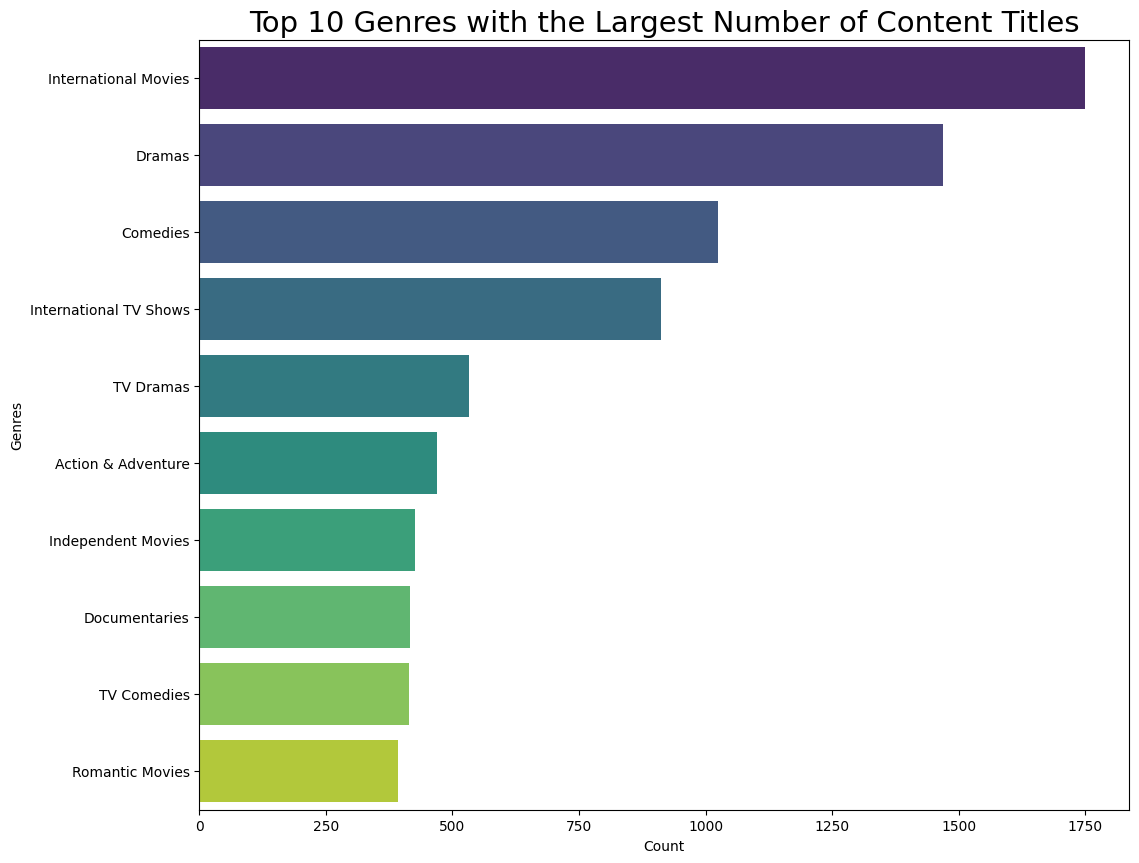

In [282]:
netflix_genres = netflix['Genres'].str.split(', ').explode('Genres')
genre_counts = netflix_genres.value_counts().reset_index(name='counts')

# Plot the top 10 genres using Seaborn
plt.figure(figsize=(12, 10))
genre_counts = genre_counts.head(10)
# Use sns.barplot for horizontal bars with hue support
sns.barplot(y='Genres', x='counts', data=genre_counts, hue='Genres', palette='viridis', orient='h', legend=False)
plt.title('Top 10 Genres with the Largest Number of Content Titles', fontsize=21)

plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()

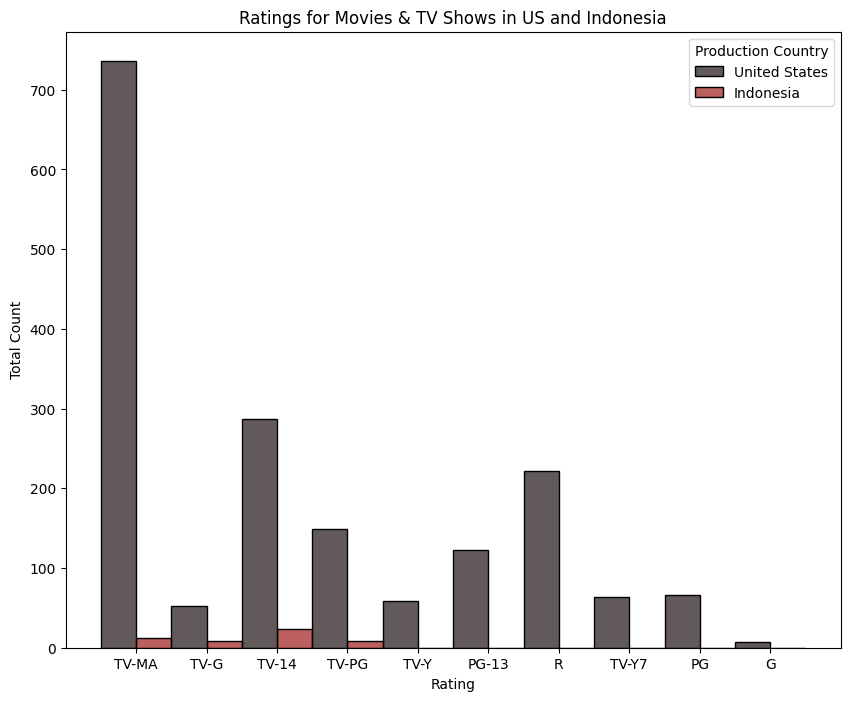

In [283]:
# Comparison of Ratings in the US and Indonesia

# US and Indonesia ratings
US_IND = netflix[netflix["Production Country"].isin(["United States", "Indonesia"])]

order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

plt.figure(figsize=(10,8))
sns.histplot(x="Rating", hue="Production Country", data=US_IND, multiple="dodge", palette="dark:brown",legend=True);
plt.title("Ratings for Movies & TV Shows in US and Indonesia")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

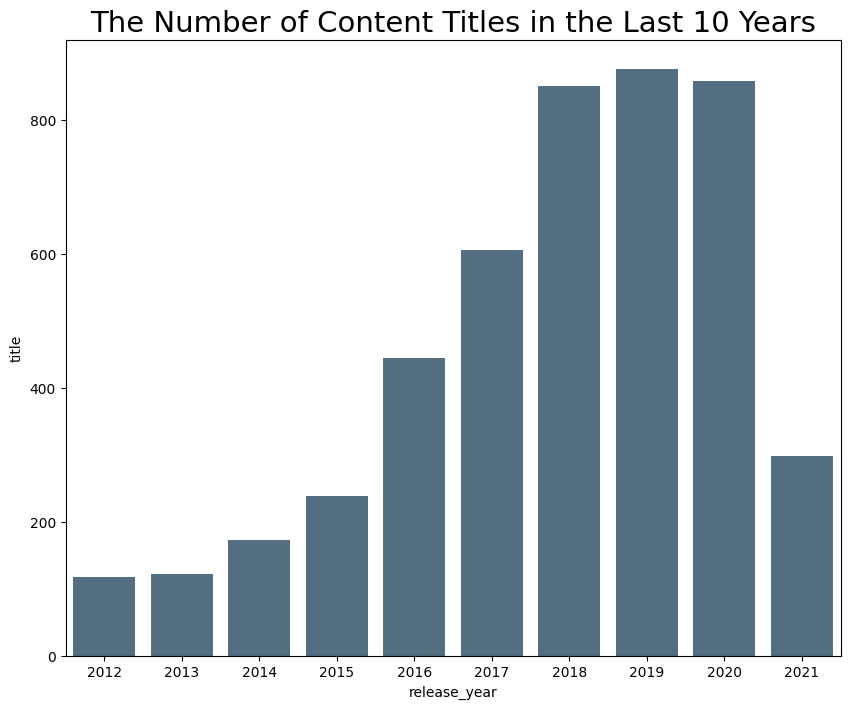

In [284]:
#The Number of Content Titles in the Last 10 Years
plt.figure(figsize=(10,8))
netflix_year = netflix['release_year'].value_counts()
netflix_year = pd.DataFrame(netflix_year).reset_index()
netflix_year.columns = ['release_year','title']
sns.barplot(x = 'release_year',y = 'title', data=netflix_year.head(10), saturation=.3)
plt.title('The Number of Content Titles in the Last 10 Years', fontsize=21);

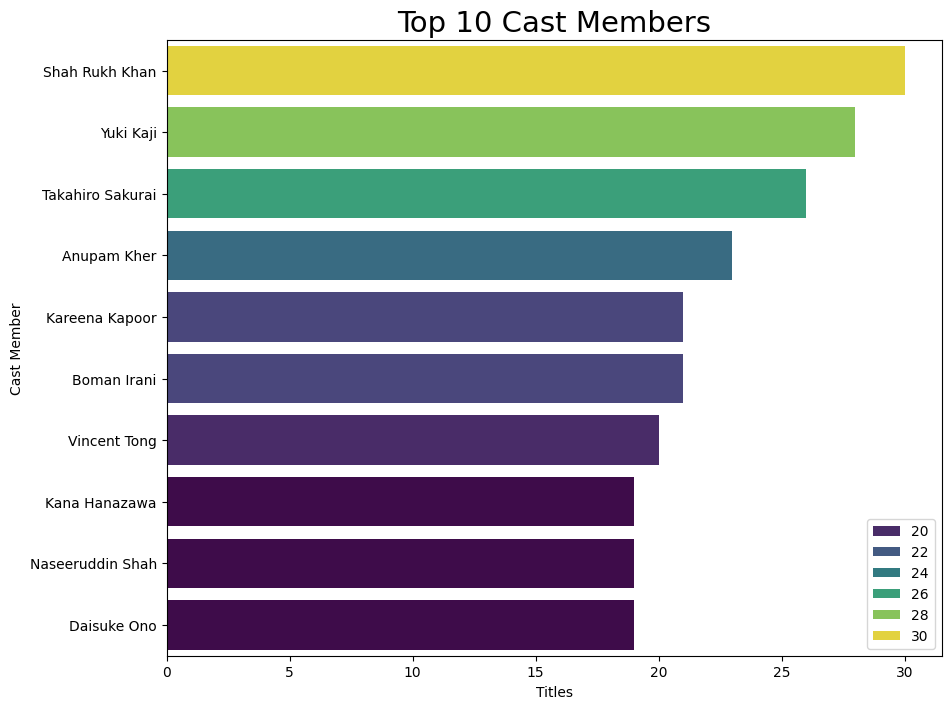

In [285]:
#Top 10 Actors by Number of Titles
cast = netflix['Cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
cast = cast[cast != 'cast unavailable']
cast_count = cast.value_counts().head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=cast_count.values, y=cast_count.index, hue=cast_count.values, palette='viridis')
plt.title('Top 10 Cast Members', fontsize=21)
plt.xlabel('Titles')
plt.ylabel('Cast Member')
plt.show()

<ipython-input-286-c3fec3cb6a75>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




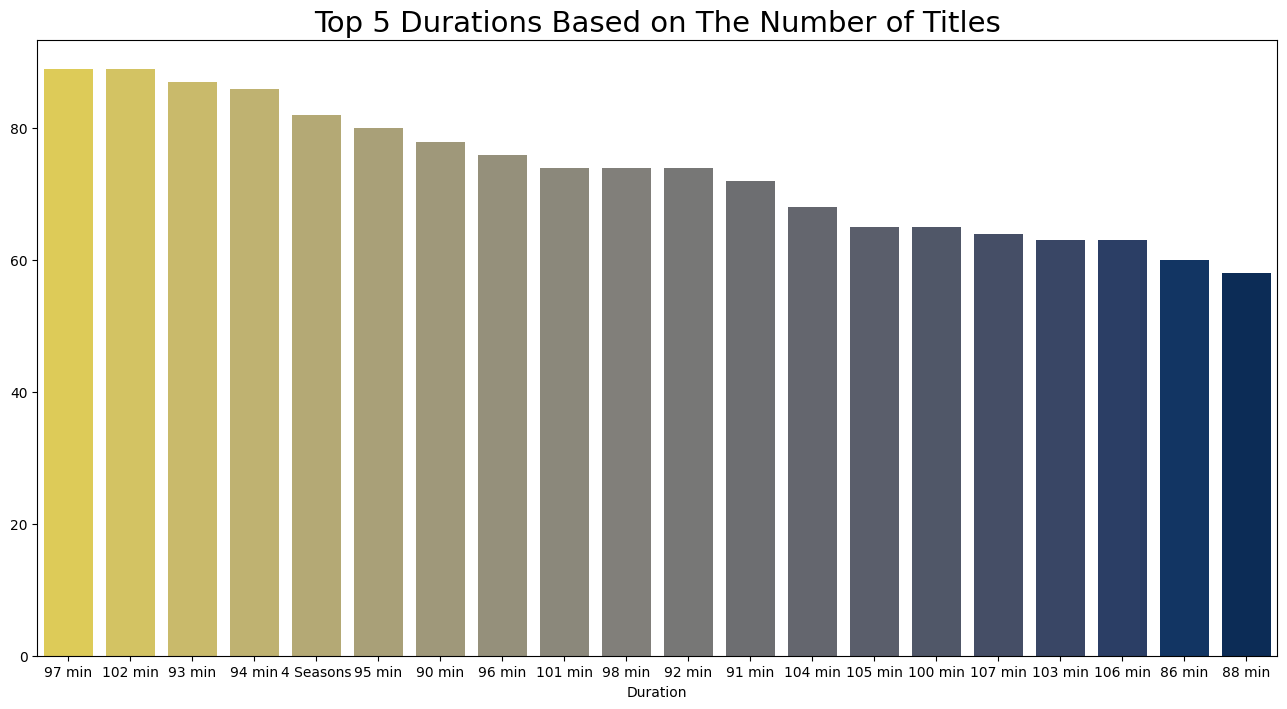

In [286]:
#Top 5 Durations Based on The Number of Titles
plt.figure(figsize=(16,8))
netflix_duration = netflix['Duration'].value_counts().iloc[3:23]
sns.barplot(y=netflix_duration.values, x=netflix_duration.index, palette="cividis_r")
plt.title('Top 5 Durations Based on The Number of Titles', fontsize=21)
# plt.xlabel('Number of Titles')
# plt.ylabel('Duration')
plt.show()

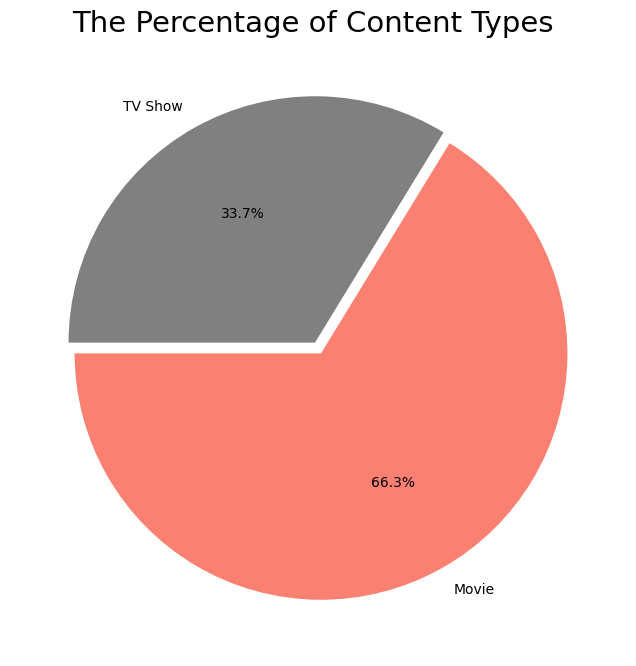

In [287]:
#Percentation of Netflix Content Types
plt.figure(figsize=(12,8))
plt.title("The Percentage of Content Types ", fontsize=21)
g = plt.pie(netflix["Content Type"].value_counts(),explode=(0.025,0.025), labels=netflix["Content Type"].value_counts().index, colors=['salmon','grey'],  autopct='%1.1f%%', startangle=180)
plt.show()

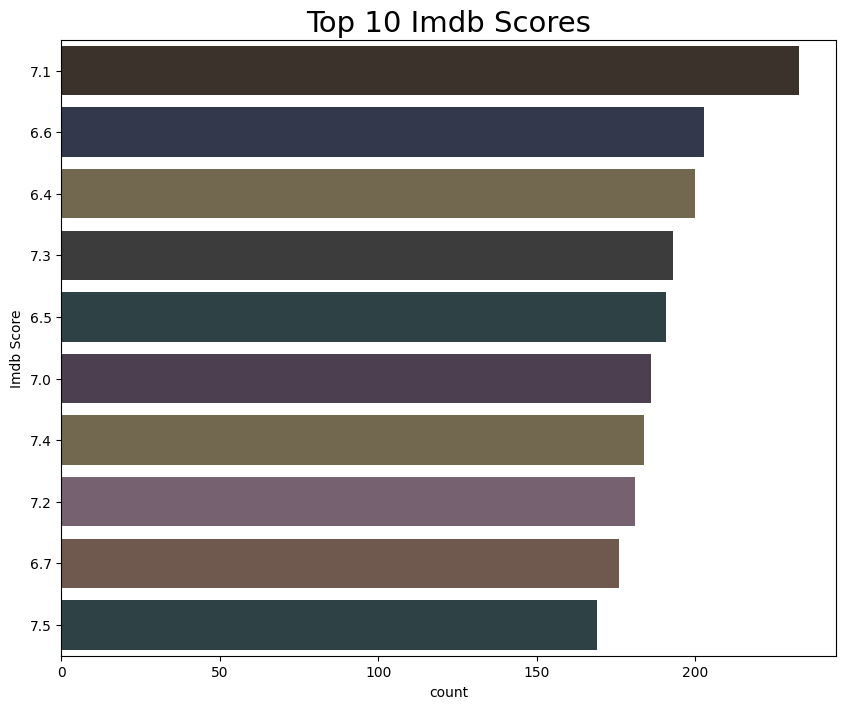

In [288]:
#Top 10 Imdb Scores
plt.figure(figsize=(10, 8))
sns.countplot(y='Imdb Score', data=netflix, order=netflix["Imdb Score"].value_counts().index[:10], hue='Imdb Score', palette='dark', saturation=.2, legend=False)
plt.title('Top 10 Imdb Scores', fontsize=21);

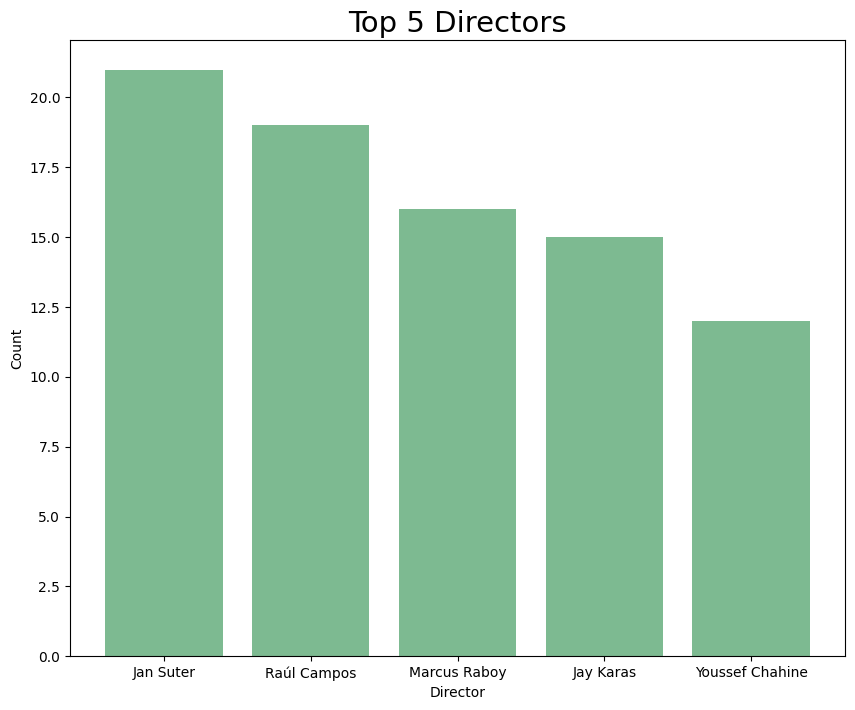

In [289]:
plt.figure(figsize=(10,8))
netflix_directors = netflix[netflix["Director"] != 'director unavailable'].set_index('Title')["Director"].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
director_counts = netflix_directors.value_counts().head(5)
plt.bar(director_counts.index, director_counts.values, color=sns.color_palette('crest')[0])
plt.title('Top 5 Directors', fontsize=21)
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()